In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import os

In [2]:
train = pd.read_csv('Datasets/train_data.csv')
test = pd.read_csv('Datasets/test_data.csv')
sample = pd.read_csv('Datasets/test_data.csv')
dictionary = pd.read_csv('Datasets/train_data_dictionary.csv')

le = preprocessing.LabelEncoder()

train.drop(['case_id'],axis=1,inplace=True)
test.drop(['case_id'],axis=1,inplace=True)

<AxesSubplot:>

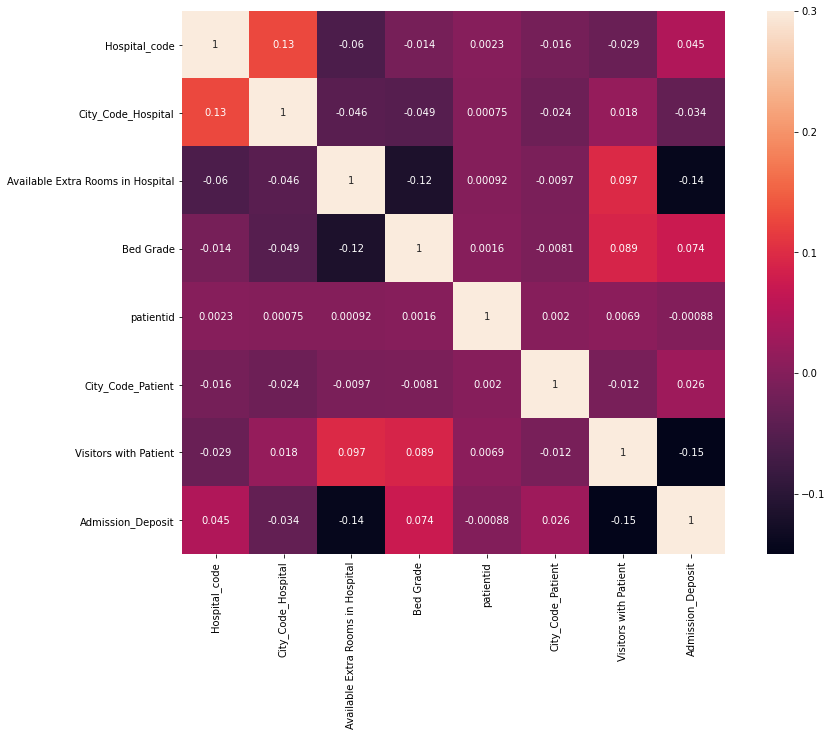

In [3]:
cor=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,vmax=.3, square=True,annot=True)

In [4]:
dummy_variable_1 = pd.get_dummies(train["Hospital_type_code"])
train = pd.concat([train, dummy_variable_1], axis=1)

In [5]:
type_list=dummy_variable_1.columns.tolist()

In [6]:
for type in type_list:
        train.rename(columns={ type :'Hospital_type_'+ type},inplace=True)

In [7]:
dummy_variable_1 = pd.get_dummies(test["Hospital_type_code"])
test = pd.concat([test, dummy_variable_1], axis=1)
type_list=dummy_variable_1.columns.tolist()
for type in type_list:
         test.rename(columns={ type :'Hospital_type_'+ type},inplace=True)

In [9]:
dummy_variable_2 = pd.get_dummies(train["Hospital_region_code"])
train = pd.concat([train, dummy_variable_2], axis=1)
region_list=dummy_variable_2.columns.tolist()
for region in region_list:
         train.rename(columns={ region :'Hospital_region_'+ region},inplace=True)

In [10]:
dummy_variable_2 = pd.get_dummies(test["Hospital_region_code"])
test = pd.concat([test, dummy_variable_2], axis=1)
region_list=dummy_variable_2.columns.tolist()
for region in region_list:
         test.rename(columns={ region :'Hospital_region_'+ region},inplace=True)

In [11]:
dummy_variable_3 = pd.get_dummies(train["Department"])
train = pd.concat([train, dummy_variable_3], axis=1)
department_list=dummy_variable_3.columns.tolist()
for dep in department_list:
         train.rename(columns={ dep : dep + '_Department'},inplace=True)

In [13]:
dummy_variable_3 = pd.get_dummies(test["Department"])
test = pd.concat([test, dummy_variable_3], axis=1)
department_list=dummy_variable_3.columns.tolist()
for dep in department_list:
         test.rename(columns={ dep : dep + '_Department'},inplace=True)

In [14]:
dummy_variable_4 = pd.get_dummies(train["Ward_Type"])
train = pd.concat([train, dummy_variable_4], axis=1)
ward_list=dummy_variable_4.columns.tolist()
for ward in ward_list:
         train.rename(columns={ ward : 'Ward_Type_'+ ward},inplace=True)

In [15]:
dummy_variable_4 = pd.get_dummies(test["Ward_Type"])
test = pd.concat([test, dummy_variable_4], axis=1)
ward_list=dummy_variable_4.columns.tolist()
for ward in ward_list:
         test.rename(columns={ ward : 'Ward_Type_'+ ward},inplace=True)

In [16]:
dummy_variable_5 = pd.get_dummies(train["Ward_Facility_Code"])
train = pd.concat([train, dummy_variable_5], axis=1)
fac_list=dummy_variable_5.columns.tolist()
for fac in fac_list:
         train.rename(columns={ fac : 'Ward_Facility_'+ fac},inplace=True)

In [17]:
dummy_variable_5 = pd.get_dummies(test["Ward_Facility_Code"])
test = pd.concat([test, dummy_variable_5], axis=1)
fac_list=dummy_variable_5.columns.tolist()
for fac in fac_list:
         test.rename(columns={ fac : 'Ward_Facility_'+ fac},inplace=True)

In [20]:
dummy_variable_6 = pd.get_dummies(train["Type of Admission"])
train = pd.concat([train, dummy_variable_6], axis=1)
ad_list=dummy_variable_6.columns.tolist()
for ad in ad_list:
         train.rename(columns={ad : ad+'_type'},inplace=True)

In [21]:
dummy_variable_6 = pd.get_dummies(test["Type of Admission"])
test = pd.concat([test, dummy_variable_6], axis=1)
ad_list=dummy_variable_6.columns.tolist()
for ad in ad_list:
         test.rename(columns={ad : ad+'_type'},inplace=True)

In [22]:
age_list=train['Age'].value_counts().index.tolist()
age_list

['41-50',
 '31-40',
 '51-60',
 '21-30',
 '71-80',
 '61-70',
 '11-20',
 '81-90',
 '0-10',
 '91-100']

In [23]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(train.Age.values.reshape(-1,1)).toarray()

In [24]:
dfOneHot = pd.DataFrame(X, columns = ["Age_"+ i for i in age_list] )

In [25]:
train = pd.concat([train, dfOneHot], axis=1)

In [26]:
X = onehotencoder.fit_transform(test.Age.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Age_"+ i for i in age_list] )
test = pd.concat([test, dfOneHot], axis=1)

In [27]:
train['Stay']=le.fit_transform(train['Stay'])

In [28]:
Mode=train['Bed Grade'].mode()
Mode

0    2.0
dtype: float64

In [29]:
train["Bed Grade"].replace(np.nan, 2.0, inplace=True)

In [30]:
Mode2=test['Bed Grade'].mode()
Mode2

0    2.0
dtype: float64

In [31]:
test["Bed Grade"].replace(np.nan, 2.0, inplace=True)

E:\DSTools\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
Avg=train['City_Code_Patient'].mean(axis=0)

In [33]:
train["City_Code_Patient"].replace(np.nan, Avg, inplace=True)

In [34]:
Avg2=test['City_Code_Patient'].mean(axis=0)

In [35]:
test["City_Code_Patient"].replace(np.nan, Avg2, inplace=True)

In [36]:
corr=train.corr()
corr.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_a,...,Age_41-50,Age_31-40,Age_51-60,Age_21-30,Age_71-80,Age_61-70,Age_11-20,Age_81-90,Age_0-10,Age_91-100
Hospital_code,1.000000,0.128294,-0.059638,-0.013374,0.002291,-0.015421,-0.028500,0.045446,0.042846,-0.072817,...,-0.007686,-0.004132,-0.006840,-0.004563,-0.002129,0.002538,0.009275,0.006597,0.006321,0.001909
City_Code_Hospital,0.128294,1.000000,-0.045771,-0.049400,0.000750,-0.023819,0.018184,-0.034455,0.006381,0.121383,...,-0.003270,-0.010193,-0.007768,-0.007969,-0.002740,0.004613,0.011476,0.013782,0.002606,-0.005247
Available Extra Rooms in Hospital,-0.059638,-0.045771,1.000000,-0.115913,0.000921,-0.009610,0.096714,-0.143739,-0.121120,0.052499,...,-0.030396,-0.013081,0.084771,0.129175,0.036752,-0.080235,-0.123252,-0.060441,-0.006888,-0.010419
Bed Grade,-0.013374,-0.049400,-0.115913,1.000000,0.001656,-0.007953,0.088950,0.073889,0.025692,-0.041291,...,0.026015,0.057834,0.032682,-0.043765,-0.072805,-0.014449,0.026394,0.047681,0.008518,-0.002058
patientid,0.002291,0.000750,0.000921,0.001656,1.000000,0.001988,0.006889,-0.000877,0.001125,0.002201,...,-0.000833,0.000192,-0.000276,0.004241,-0.000916,-0.000351,-0.005355,0.001446,0.002410,-0.003489


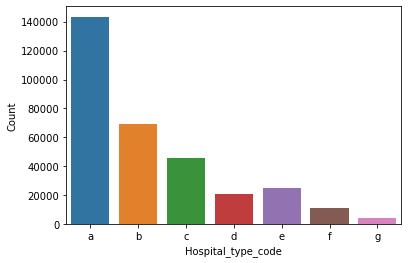

In [37]:
Grt=train.groupby(['Hospital_type_code'],as_index=False)['Hospital_code'].count()
Grt.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grt, x='Hospital_type_code', y = "Count")
plt.show()

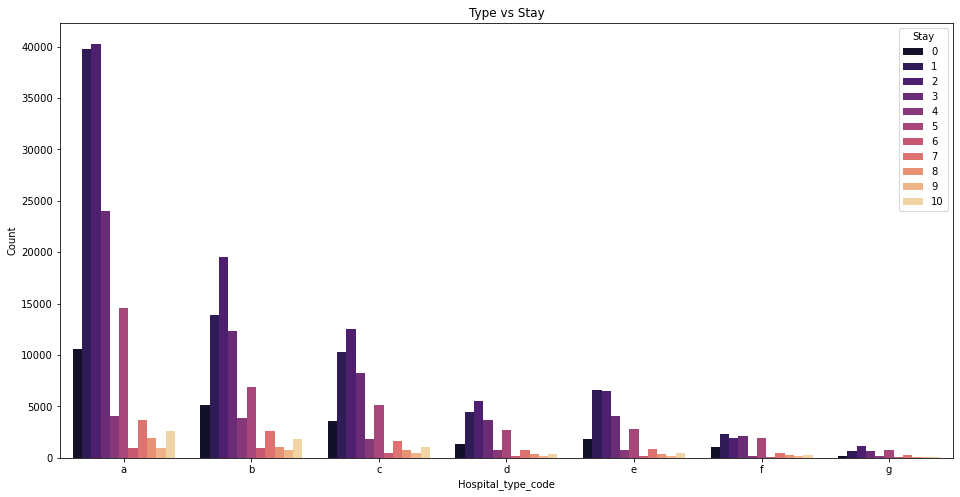

In [38]:
plt.figure(figsize=(16,8))
dft=train[['Hospital_type_code','Stay','Hospital_code']]
typ=dft.groupby(['Hospital_type_code','Stay'],as_index=False).count()
typ.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Hospital_type_code', y='Count', hue='Stay', data=typ,palette='magma')
plt.title('Type vs Stay')
plt.show()

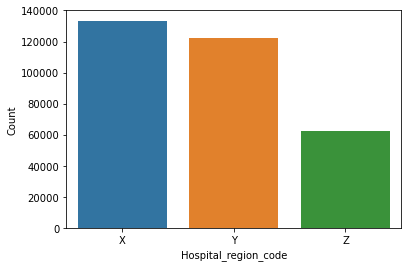

In [39]:
Grr=train.groupby(['Hospital_region_code'],as_index=False)['Hospital_code'].count()
Grr.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grr, x='Hospital_region_code', y = "Count")
plt.show()

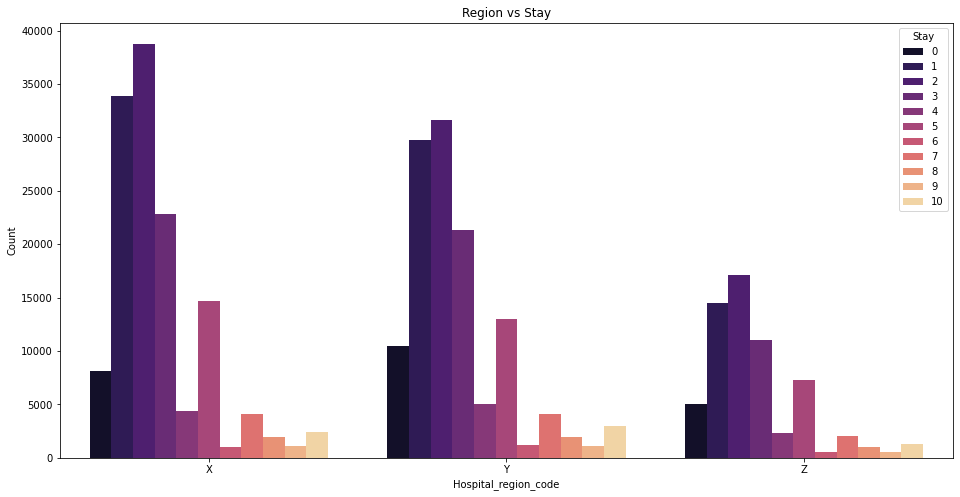

In [40]:
plt.figure(figsize=(16,8))
dfr=train[['Hospital_region_code','Stay','Hospital_code']]
reg=dfr.groupby(['Hospital_region_code','Stay'],as_index=False).count()
reg.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Hospital_region_code', y='Count', hue='Stay', data=reg,palette='magma')
plt.title('Region vs Stay')
plt.show()

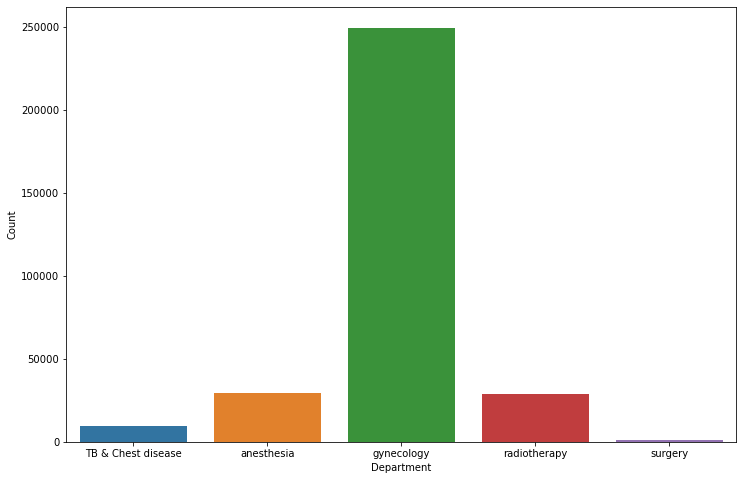

In [41]:
plt.figure(figsize=(12,8))
Grd=train.groupby(['Department'],as_index=False)['Hospital_code'].count()
Grd.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grd, x='Department', y = "Count")
plt.show()

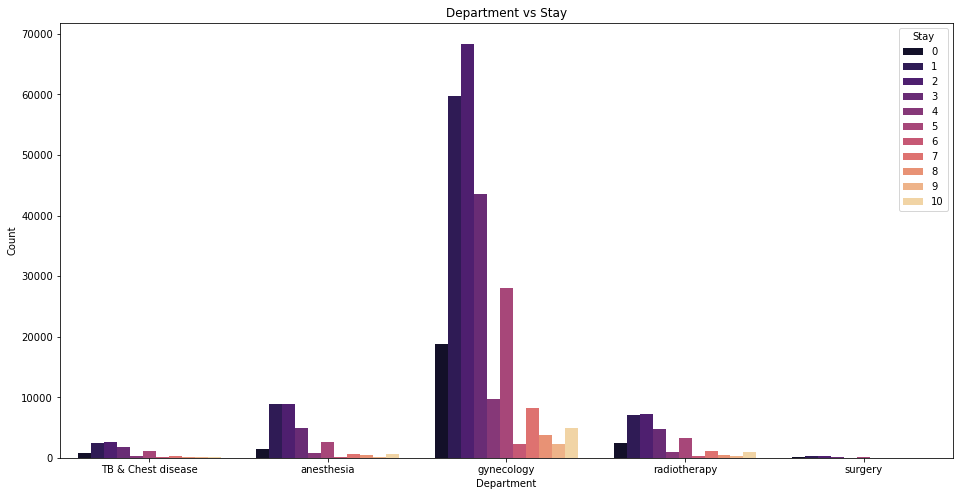

In [42]:
plt.figure(figsize=(16,8))
dfd=train[['Department','Stay','Hospital_code']]
dep=dfd.groupby(['Department','Stay'],as_index=False).count()
dep.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Department', y='Count', hue='Stay', data=dep,palette='magma')
plt.title('Department vs Stay')
plt.show()

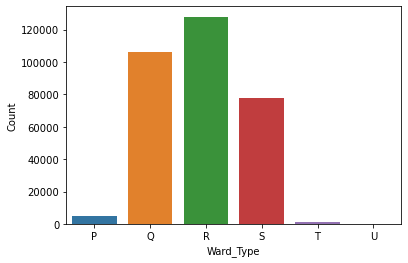

In [43]:
Grw=train.groupby(['Ward_Type'],as_index=False)['Hospital_code'].count()
Grw.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grw, x='Ward_Type', y = "Count")
plt.show()

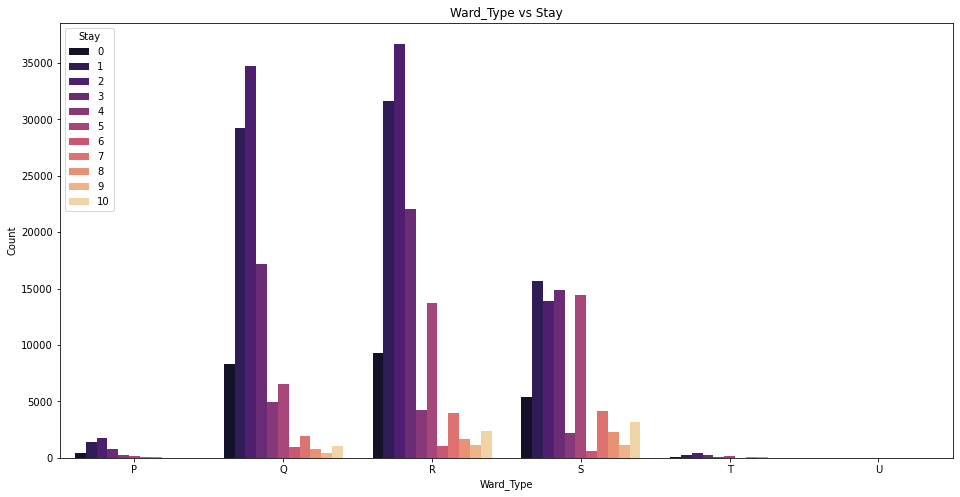

In [44]:
plt.figure(figsize=(16,8))
dfw=train[['Ward_Type','Stay','Hospital_code']]
ward=dfw.groupby(['Ward_Type','Stay'],as_index=False).count()
ward.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Ward_Type', y='Count', hue='Stay', data=ward,palette='magma')
plt.title('Ward_Type vs Stay')
plt.show()

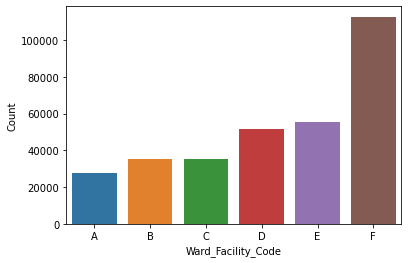

In [45]:
Grf=train.groupby(['Ward_Facility_Code'],as_index=False)['Hospital_code'].count()
Grf.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grf, x='Ward_Facility_Code', y = "Count")
plt.show()

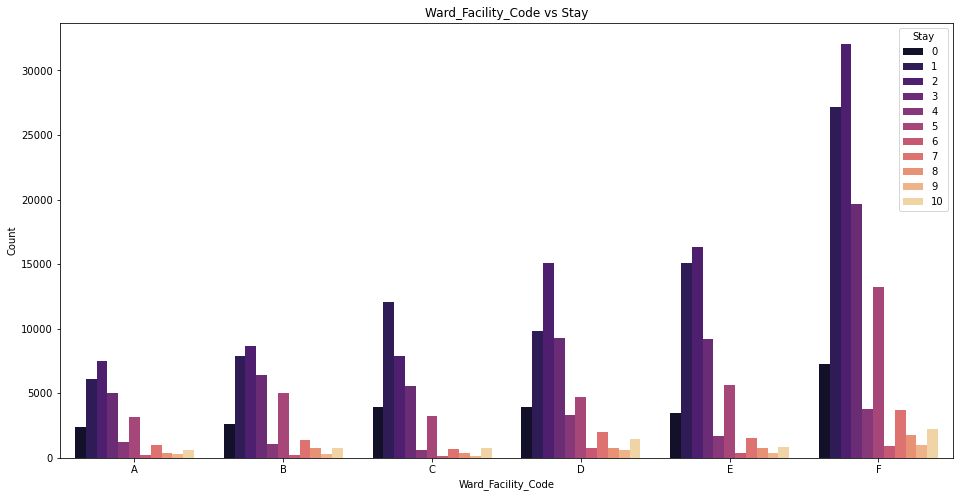

In [46]:
plt.figure(figsize=(16,8))
dff=train[['Ward_Facility_Code','Stay','Hospital_code']]
fac=dff.groupby(['Ward_Facility_Code','Stay'],as_index=False).count()
fac.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Ward_Facility_Code', y='Count', hue='Stay', data=fac,palette='magma')
plt.title('Ward_Facility_Code vs Stay')
plt.show()

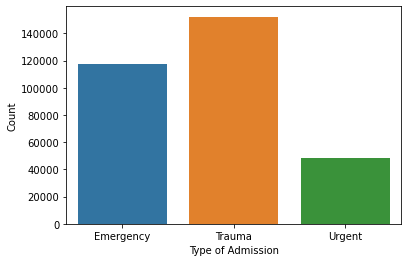

In [47]:
Gra=train.groupby(['Type of Admission'],as_index=False)['Hospital_code'].count()
Gra.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Gra, x='Type of Admission', y = "Count")
plt.show()

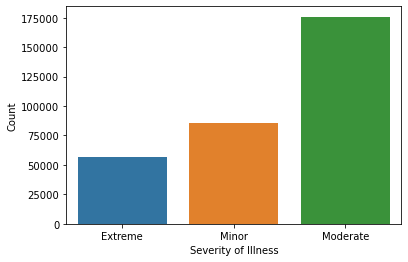

In [48]:
Grs=train.groupby(['Severity of Illness'],as_index=False)['Hospital_code'].count()
Grs.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grs, x='Severity of Illness', y = "Count")
plt.show()

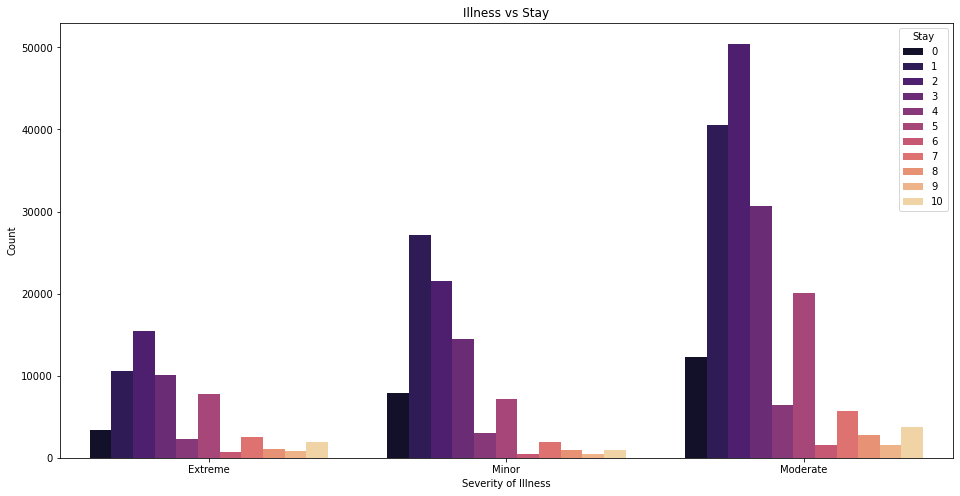

In [49]:
plt.figure(figsize=(16,8))
dfs=train[['Severity of Illness','Stay','Hospital_code']]
se=dfs.groupby(['Severity of Illness','Stay'],as_index=False).count()
se.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Severity of Illness', y='Count', hue='Stay', data=se,palette='magma')
plt.title('Illness vs Stay')
plt.show()

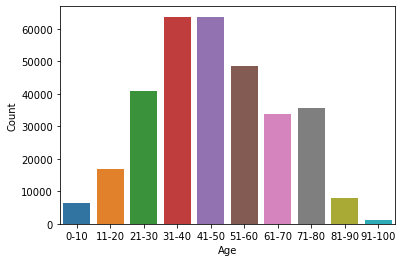

In [50]:
Grag=train.groupby(['Age'],as_index=False)['Hospital_code'].count()
Grag.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grag, x='Age', y = "Count")
plt.show()

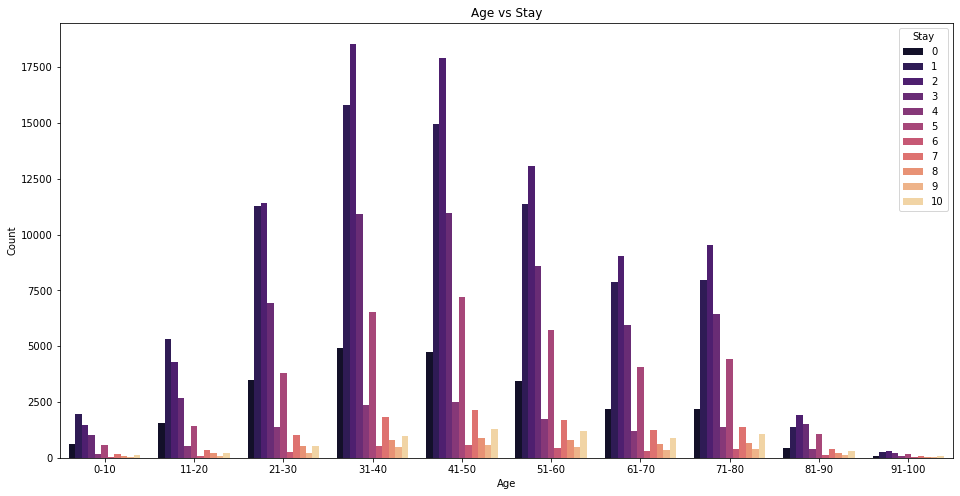

In [51]:
plt.figure(figsize=(16,8))
dfag=train[['Age','Stay','Hospital_code']]
age=dfag.groupby(['Age','Stay'],as_index=False).count()
age.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Age', y='Count', hue='Stay', data=age,palette='magma')
plt.title('Age vs Stay')
plt.show()

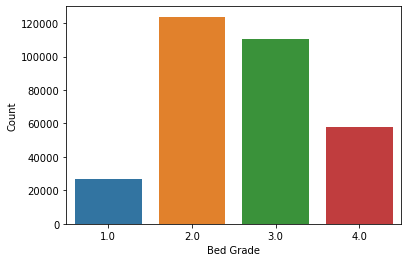

In [52]:
Grab=train.groupby(['Bed Grade'],as_index=False)['Hospital_code'].count()
Grab.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(data=Grab, x='Bed Grade', y = "Count")
plt.show()

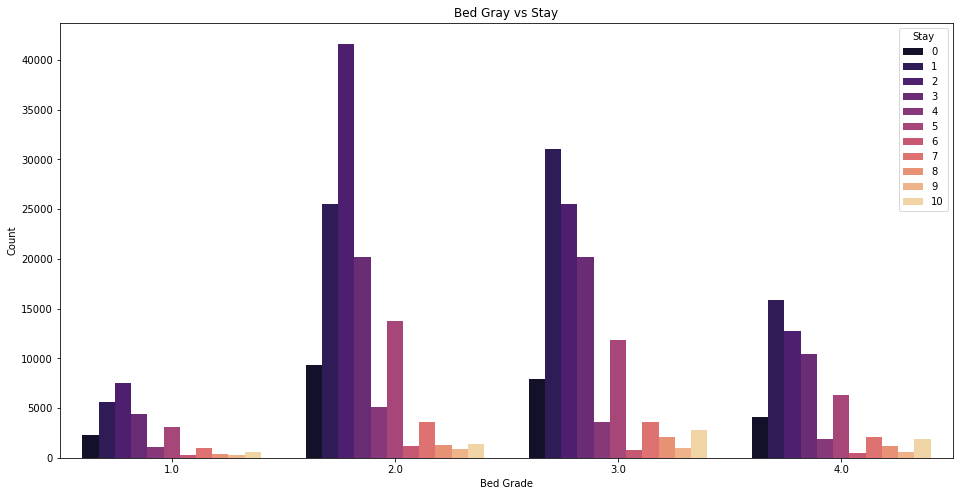

In [53]:
plt.figure(figsize=(16,8))
dfab=train[['Bed Grade','Stay','Hospital_code']]
bed=dfab.groupby(['Bed Grade','Stay'],as_index=False).count()
bed.rename(columns={'Hospital_code':'Count'},inplace=True)
sns.barplot(x='Bed Grade', y='Count', hue='Stay', data=bed,palette='magma')
plt.title('Bed Gray vs Stay')
plt.show()

<AxesSubplot:>

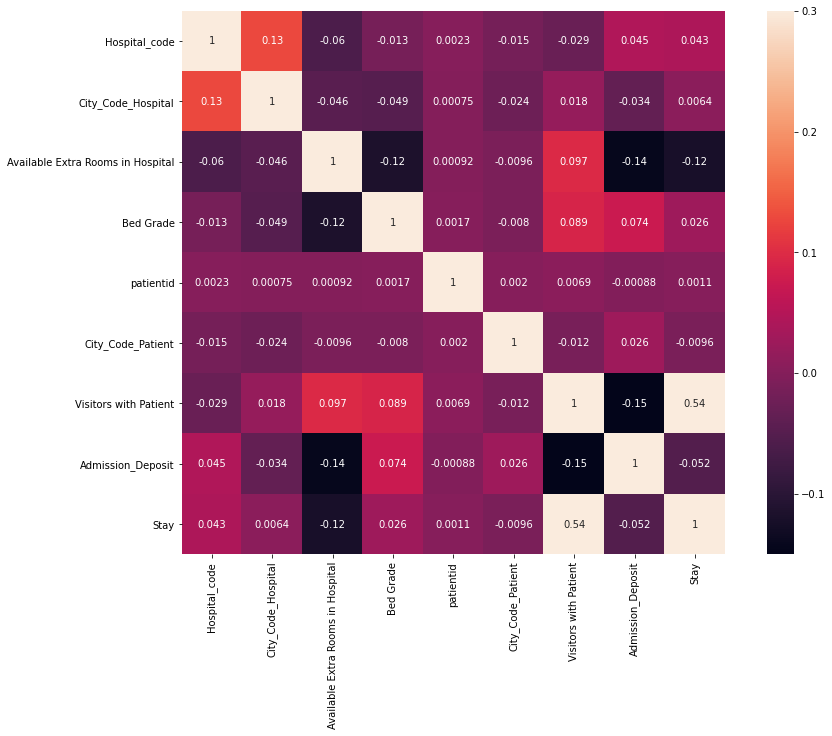

In [54]:
c=train[['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(c,vmax=.3, square=True,annot=True)

In [55]:
train.drop(['City_Code_Patient','City_Code_Hospital','patientid','Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age'],axis=1,inplace=True)
test.drop(['City_Code_Patient','City_Code_Hospital','patientid','Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age'],axis=1,inplace=True)

In [58]:
train.shape

(318438, 46)

In [59]:
test.shape

(137057, 48)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix


In [61]:
scaler=preprocessing.MinMaxScaler()
scaled=pd.DataFrame(scaler.fit_transform(train),columns=train.columns)

In [75]:
X=train[['Hospital_code','Admission_Deposit','Bed Grade','Available Extra Rooms in Hospital', 'Visitors with Patient',
         'Hospital_type_a', 'Hospital_type_b','Hospital_type_c', 'Hospital_type_d', 'Hospital_type_e','Hospital_type_f', 'Hospital_type_g',
         'Hospital_region_X','Hospital_region_Y', 'Hospital_region_Z','TB & Chest disease_Department', 'anesthesia_Department',
         'gynecology_Department', 'radiotherapy_Department','surgery_Department', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
         'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U', 'Ward_Facility_A','Ward_Facility_B', 'Ward_Facility_C', 'Ward_Facility_D',
         'Ward_Facility_E', 'Ward_Facility_F' , 'Extreme_type', 'Minor_type', 'Moderate_type', 'Emergency_type',
         'Trauma_type','Urgent_type','Age_41-50', 'Age_31-40', 'Age_51-60', 'Age_21-30', 'Age_71-80','Age_61-70', 'Age_11-20', 'Age_81-90', 'Age_0-10', 'Age_91-100']]
Y= train['Stay']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

KeyError: "['Extreme_type', 'Minor_type', 'Moderate_type'] not in index"

In [67]:
rfclassifier=RandomForestClassifier(criterion= 'entropy', max_depth= 15, n_estimators=60,random_state=0)
rfclassifier.fit(X_train,y_train)
rfpred=rfclassifier.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
print (classification_report(y_test, rfpred))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(rfclassifier,X_test,y_test,ax=ax)